## Training the tensorflow model for predictive LCIA
### Single Layer Neural Nets

In [1]:
import sys
sys.path.append("./src") # append to system path

import create_model as mt
from sklearn import cross_validation
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#static parameters
BATCH_SIZE = 1
RUGULARIZATION = 0.

/home/runsheng/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Cumulative Energy Demand Model:
### Load data
from csv

In [17]:
descs_p = './data/descs/descs_Mar07_166.csv'
target_p = './data/target/CED.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=1)

### Initilize the Model Object Here
start training

In [18]:
print train_x.shape, train_y.shape

(132, 77) (132, 1)


In [19]:
this_model = mt.single_layer_model('./nets/Mar2_CED/CED_Mar2')

### Data Preprocessing
We have option to do normalization and PCA here (choose one)

Standard scaler:

In [11]:
train_x, test_x, vec = this_model.fit_vec(StandardScaler(),train_x, test_x)

Or PCA:

In [ ]:
#normalize the data first

pca = PCA(n_components = 500)
train_x, test_x, vec = this_model.fit_vec(pca,train_x, test_x)

In [20]:
print train_x.shape, train_y.shape

(132, 77) (132, 1)


epoch 0, train acc: -0.0719889, test acc: -0.818064
epoch 100, train acc: 0.933098, test acc: 0.38388
epoch 200, train acc: 0.964419, test acc: 0.353443
epoch 300, train acc: 0.982494, test acc: 0.294454
epoch 400, train acc: 0.99292, test acc: 0.28659
epoch 500, train acc: 0.99665, test acc: 0.281634
epoch 600, train acc: 0.998608, test acc: 0.293811
epoch 700, train acc: 0.999166, test acc: 0.305182
epoch 800, train acc: 0.999101, test acc: 0.31602
epoch 900, train acc: 0.998478, test acc: 0.315973
[ 73.99070152] [ 75.15783691]
[ 91.36306728] [ 134.81782532]
[ 63.38683726] [ 69.17811584]
[ 84.7977266] [ 95.20829773]
[ 52.25829943] [ 38.16643906]
[ 50.59190421] [ 74.49610901]
[ 64.1670572] [ 54.66931152]
[ 91.71323266] [ 93.72397614]
[ 76.72259093] [ 60.66124725]
[ 83.76170589] [ 120.91043091]
Model Saved in : ./nets/Mar2_CED/CED_Mar2


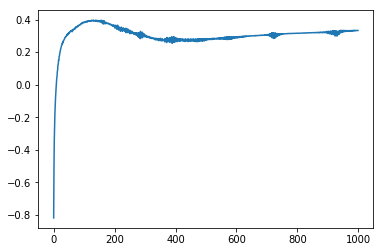

In [21]:
this_model.train(train_x, train_y, test_x, test_y, num_epoch=1000, num_neroun=128, learning_rate=0.01,verbose=False)

### Load Model and Predict
Load the trained model and predict it on the test data, compare it with the Y

In [ ]:
new_model = mt.single_layer_model.load_model('./nets/Mar2_CED/CED_Mar2.json')
this_pred = new_model.predict(test_x)
r2 = r2_score(test_y, this_pred)
print r2

# Create the Acidification Model
Here I want to try to do data preprocessing separately

In [81]:
descs_p = './data/descs/descs_Mar08_166_3839.csv'
target_p = './data/target/acidification.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=1)

In [82]:
print train_x.shape, train_y.shape

(132, 3839) (132, 1)


### Data Preprocessing

PCA
1. Normalize the data first
2. Then Do PCA on the normalized data

In [83]:
this_scale = StandardScaler()
this_pca = PCA(n_components=10)

train_x = this_scale.fit_transform(train_x)
test_x = this_scale.transform(test_x)

train_x = this_pca.fit_transform(train_x)
test_x = this_pca.transform(test_x)



In [84]:
print train_x.mean(axis=0)

[ -1.88401483e-16   1.21115239e-16   2.69144976e-17  -1.21115239e-16
  -5.14739766e-16  -1.95130107e-16  -1.27843863e-16   4.97918205e-16
   3.54934937e-16   7.46877307e-16]


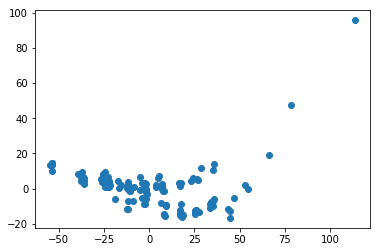

In [85]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.show()

### Initialize the model

In [86]:
print train_x.shape, train_y.shape

(132, 10) (132, 1)


In [87]:
acid_model = mt.single_layer_model('./nets/Mar2_acid/acid_Mar2')

epoch 0, train acc: -9.53383, test acc: -35.4246
epoch 100, train acc: 0.82, test acc: 0.166331
epoch 200, train acc: 0.836897, test acc: 0.149373
epoch 300, train acc: 0.847758, test acc: 0.258527
epoch 400, train acc: 0.855897, test acc: 0.288428
epoch 500, train acc: 0.861688, test acc: 0.347538
epoch 600, train acc: 0.865807, test acc: 0.394964
epoch 700, train acc: 0.868254, test acc: 0.420403
epoch 800, train acc: 0.870838, test acc: 0.434592
epoch 900, train acc: 0.873299, test acc: 0.446345
epoch 1000, train acc: 0.875106, test acc: 0.453988
epoch 1100, train acc: 0.877125, test acc: 0.456099
epoch 1200, train acc: 0.878571, test acc: 0.457789
epoch 1300, train acc: 0.880299, test acc: 0.459317
epoch 1400, train acc: 0.881628, test acc: 0.455072
epoch 1500, train acc: 0.882653, test acc: 0.45008
epoch 1600, train acc: 0.883869, test acc: 0.452869
epoch 1700, train acc: 0.884692, test acc: 0.452237
epoch 1800, train acc: 0.885692, test acc: 0.45732
epoch 1900, train acc: 0.88638

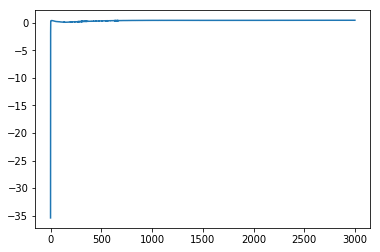

In [94]:
acid_model.train(train_x, train_y, test_x, test_y, num_epoch=3000, num_neroun=128, learning_rate=0.01,verbose=False)

# GWP Model

In [15]:
descs_p = './data/descs/descs_Mar08_166_3839.csv'
target_p = './data/target/GWP.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=10)

In [16]:
print train_x.shape, train_y.shape

(132, 3839) (132, 1)


### Data Preprocessing
PCA
1. Normalize the data first
2. Then Do PCA on the normalized data

In [17]:
this_scale = StandardScaler()
this_pca = PCA(n_components=10)

train_x = this_scale.fit_transform(train_x)
test_x = this_scale.transform(test_x)

train_x = this_pca.fit_transform(train_x)
test_x = this_pca.transform(test_x)

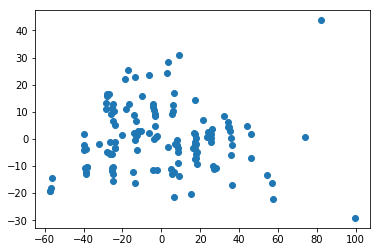

In [18]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.show()

In [19]:
gwp_model = mt.single_layer_model('./nets/Mar2_gwp/gwp_Mar2')

epoch 0, train acc: 0.0613176, test acc: -0.253127
epoch 100, train acc: 0.709939, test acc: -5.49673
epoch 200, train acc: 0.722155, test acc: -6.62868
epoch 300, train acc: 0.72538, test acc: -6.89179
epoch 400, train acc: 0.728009, test acc: -7.1289
epoch 500, train acc: 0.730289, test acc: -7.54189
epoch 600, train acc: 0.73248, test acc: -8.21605
epoch 700, train acc: 0.734384, test acc: -8.77161
epoch 800, train acc: 0.736323, test acc: -9.35936
epoch 900, train acc: 0.738023, test acc: -9.80508
[ 4.2194685] [ 4.55170393]
[ 3.7046095] [ 73.10474396]
[ 2.7989784] [ 2.13099504]
[ 2.1870738] [ 3.51686859]
[ 2.9534432] [ 1.89551449]
[ 2.4963847] [ 2.24459267]
[ 2.5694999] [ 2.21235251]
[ 2.3123312] [ 7.96148396]
[ 3.7046095] [ 37.7454834]
[ 6.9290922] [ 8.05394173]
Model Saved in : ./nets/Mar2_gwp/gwp_Mar2


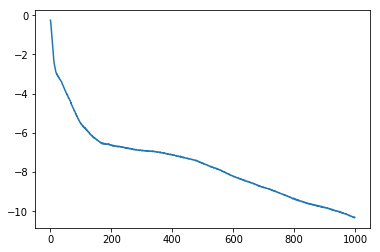

In [20]:
gwp_model.train(train_x, train_y, test_x, test_y, num_epoch=1000, num_neroun=10, learning_rate=0.001,verbose=False)

# EI99 Model

In [35]:
descs_p = './data/descs/descs_Mar07_166.csv'
target_p = './data/target/EI99.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=1)

In [36]:
print train_x.shape, train_y.shape

(132, 77) (132, 1)


### Data Preprocessing
PCA
1. Normalize the data first
2. Then Do PCA on the normalized data

In [28]:
this_scale = StandardScaler()
this_pca = PCA(n_components=10)

train_x = this_scale.fit_transform(train_x)
test_x = this_scale.transform(test_x)

train_x = this_pca.fit_transform(train_x)
test_x = this_pca.transform(test_x)

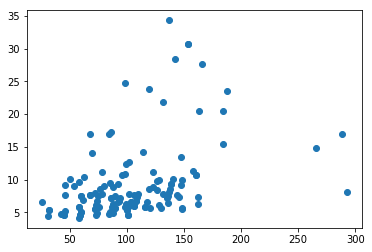

In [37]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.show()

### Initialize the model

In [38]:
ei99_model = mt.single_layer_model('./nets/Mar2_ei99/ei99_Mar2')

epoch 0, train acc: -0.0262548, test acc: -0.0238508
epoch 100, train acc: 0.687249, test acc: 0.473098
epoch 200, train acc: 0.757064, test acc: 0.440156
epoch 300, train acc: 0.769097, test acc: 0.446356
epoch 400, train acc: 0.777054, test acc: 0.425171
epoch 500, train acc: 0.785009, test acc: 0.406485
epoch 600, train acc: 0.789436, test acc: 0.401309
epoch 700, train acc: 0.792086, test acc: 0.399004
epoch 800, train acc: 0.79549, test acc: 0.40451
epoch 900, train acc: 0.798064, test acc: 0.402202
[ 0.38153348] [ 0.40909296]
[ 0.46538603] [ 0.86778295]
[ 0.03352277] [ 0.17614004]
[ 0.43350335] [ 0.64791465]
[ 0.52045459] [ 0.39199045]
[ 0.10351547] [ 0.26163745]
[ 0.1155104] [ 0.40875]
[ 0.40160288] [ 0.24075902]
[ 0.21076428] [ 0.20213343]
[ 0.36783612] [ 0.36715317]
Model Saved in : ./nets/Mar2_ei99/ei99_Mar2


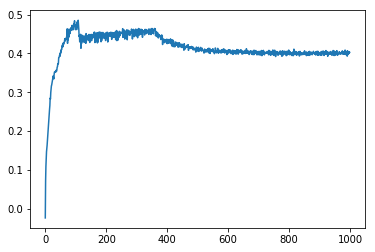

In [39]:
ei99_model.train(train_x, train_y, test_x, test_y, num_epoch=1000, num_neroun=10, learning_rate=0.001,verbose=False)

# Human Health Model

In [50]:
descs_p = './data/descs/descs_Mar07_166.csv'
target_p = './data/target/humanhealth.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=1)

In [51]:
print train_x.shape, train_y.shape

(132, 77) (132, 1)


### Data Preprocessing
PCA
1. Normalize the data first
2. Then Do PCA on the normalized data

In [49]:
this_scale = StandardScaler()
this_pca = PCA(n_components=10)

train_x = this_scale.fit_transform(train_x)
test_x = this_scale.transform(test_x)

train_x = this_pca.fit_transform(train_x)
test_x = this_pca.transform(test_x)

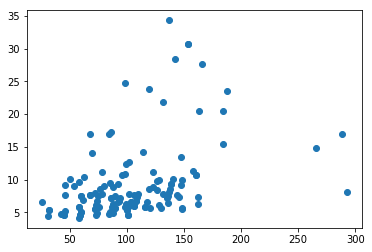

In [52]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.show()

### Initialize the model

In [53]:
humanhealth_model = mt.single_layer_model('./nets/Mar2_humanhealth/humanhealth_Mar2')

epoch 0, train acc: -1.60132e+06, test acc: -1.28188e+06
epoch 100, train acc: -21.9481, test acc: -46.6028
epoch 200, train acc: -6.80731, test acc: -10.5943
epoch 300, train acc: -2.38175, test acc: -3.25807
epoch 400, train acc: -0.771788, test acc: -0.951508
epoch 500, train acc: -0.099158, test acc: -0.105339
epoch 600, train acc: 0.193725, test acc: 0.208888
epoch 700, train acc: 0.308004, test acc: 0.298252
epoch 800, train acc: 0.332292, test acc: 0.28605
epoch 900, train acc: 0.31263, test acc: 0.232773
[ 0.0005346] [ 0.00040465]
[ 0.00068644] [ 0.00115772]
[  5.56000000e-05] [ 0.00058622]
[ 0.00052693] [-0.00034486]
[ 0.00074007] [ 0.00086368]
[  8.10000000e-05] [ 0.00058544]
[  9.59000000e-05] [ 0.00063351]
[ 0.00056727] [-0.0001901]
[ 0.00018512] [ 0.00026043]
[ 0.00045007] [ 0.00044737]
Model Saved in : ./nets/Mar2_humanhealth/humanhealth_Mar2


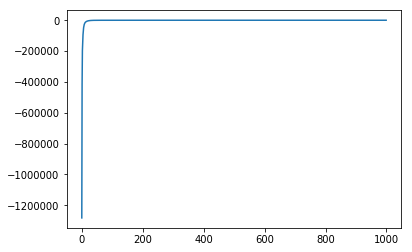

In [54]:
humanhealth_model.train(train_x, train_y, test_x, test_y, num_epoch=1000, num_neroun=10, learning_rate=0.001,verbose=False)

# Ecosystem Quality Model

In [61]:
descs_p = './data/descs/descs_Mar07_166.csv'
target_p = './data/target/ecosystemquality.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=1)

In [62]:
print train_x.shape, train_y.shape

(132, 77) (132, 1)


### Data Preprocessing
PCA
1. Normalize the data first
2. Then Do PCA on the normalized data

In [57]:
this_scale = StandardScaler()
this_pca = PCA(n_components=10)

train_x = this_scale.fit_transform(train_x)
test_x = this_scale.transform(test_x)

train_x = this_pca.fit_transform(train_x)
test_x = this_pca.transform(test_x)

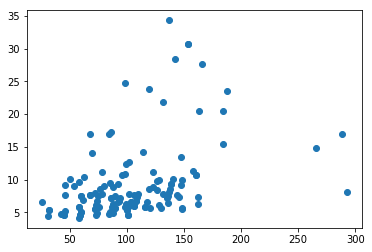

In [63]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.show()

### Initialize the model

In [64]:
ecosystemquality_model = mt.single_layer_model('./nets/Mar2_ecosystemquality/ecosystemquality_Mar2')

In [65]:
ecosystemquality_model.train(train_x, train_y, test_x, test_y, num_epoch=1000, num_neroun=10, learning_rate=0.001,verbose=False)

epoch 0, train acc: -1.69038e+06, test acc: -1.5061e+06
epoch 100, train acc: -5.50182, test acc: -6.10765
epoch 200, train acc: -0.344139, test acc: -0.518634
epoch 300, train acc: -0.871188, test acc: -2.31762
epoch 400, train acc: -1.59471, test acc: -4.09655
epoch 500, train acc: -1.94277, test acc: -4.82709
epoch 600, train acc: -1.99093, test acc: -4.75883
epoch 700, train acc: -1.81912, test acc: -4.21527
epoch 800, train acc: -1.52417, test acc: -3.42904
epoch 900, train acc: -1.19237, test acc: -2.59227
[ 0.00010755] [  7.56889931e-05]
[ 0.00012583] [ -2.29838115e-05]
[  2.34000000e-06] [  3.82433755e-05]
[ 0.00011522] [ 0.00072239]
[ 0.00012991] [  9.43513587e-05]
[  1.17000000e-05] [ -6.73990435e-05]
[  1.27000000e-05] [ -6.43587628e-05]
[ 0.00011437] [ 0.00039116]
[  2.41000000e-05] [  2.80282911e-05]
[  9.31000000e-05] [  6.64924009e-05]


ValueError: Parent directory of ./nets/Mar2_ecosystemquality/ecosystemquality_Mar2 doesn't exist, can't save.